*Manifold Learning* - a class of unsupervised estimators that seeks to describe datasets as lowdimensional manifolds embedded in high-dimensional spaces.

*We can think of this sheet as a two-dimensional manifold embedded in three-dimensional space*

In [2]:
%matplotlib inline       
import matplotlib.pyplot as plt       
import seaborn as sns; sns.set()       
import numpy as np 

### Manifold Learning: “HELLO” 

In [3]:
def make_hello(N=1000, rseed=42):    
    # Make a plot with "HELLO" text; save as PNG    
    fig, ax = plt.subplots(figsize=(4, 1))    
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)    
    ax.axis('off')    
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)    
    fig.savefig('hello.png')    
    plt.close(fig)
    
    # Open this PNG and draw random points from it    
    from matplotlib.image import imread    
    data = imread('hello.png')[::-1, :, 0].T    
    rng = np.random.RandomState(rseed)    
    X = rng.rand(4 * N, 2)    
    i, j = (X * data.shape).astype(int).T    
    mask = (data[i, j] < 1)    
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])    
    X = X[:N]    
    return X[np.argsort(X[:, 0])] 

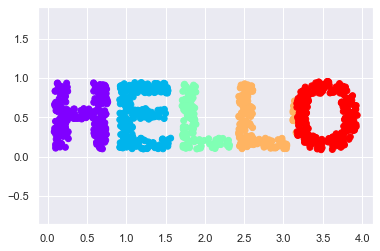

In [4]:
 X = make_hello(1000)       
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))       
plt.scatter(X[:, 0], X[:, 1], **colorize)       
plt.axis('equal');


- The output is two dimensional, and consists of points drawn in the shape of the word “HELLO”. 
This data form will help us to see visually what these algorithms are doing. 

### Multidimensional Scaling (MDS)

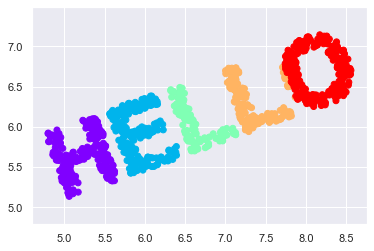

In [5]:
#if we use a rotation matrix to rotate the data, the x and y values change, but the data is still fundamentally the same:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

- This tells us that the x and y values are not necessarily fundamental to the relationships in the data.
- What is fundamental, in this case, is the distance between each point and the other points in the dataset. 

In [6]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

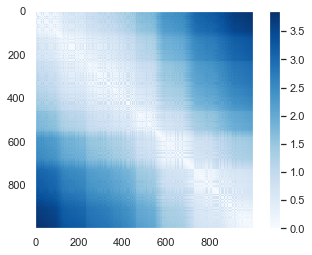

In [7]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [8]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

- This is exactly what the multidimensional scaling algorithm aims to do: 
    - given a distance matrix between points, it recovers a  D -dimensional coordinate representation of the data. 

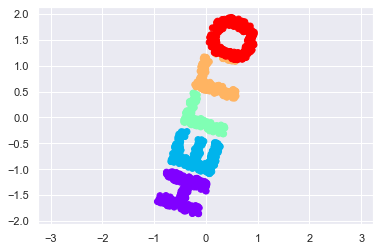

In [9]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using *only* the $N\times N$ distance matrix describing the relationship between the data points.